In [1]:
from scipy.signal import find_peaks, correlate2d
from utils import correlation, pad_arrays
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img = cv2.imread('asia.jpg', cv2.IMREAD_GRAYSCALE)

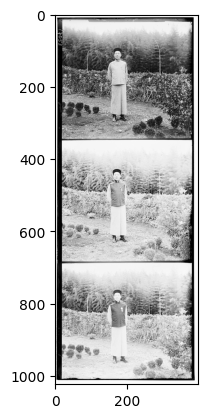

In [3]:
plt.imshow(img, cmap="gray")

In [6]:
Rcomp = img[0:ai, :]
Gcomp = img[ai:bi, :]
Bcomp = img[bi:-1, :]

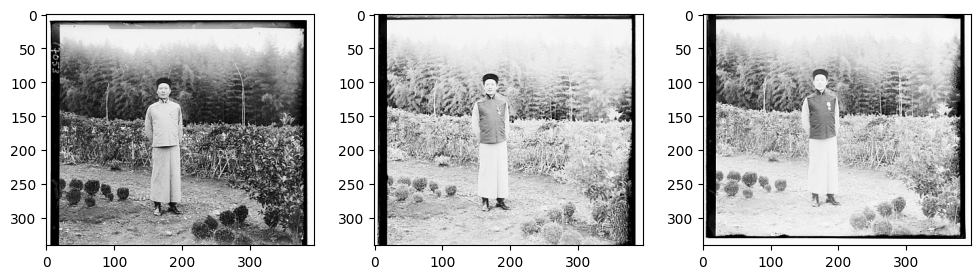

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].imshow(Rcomp, cmap="gray")
ax[1].imshow(Gcomp, cmap="gray")
ax[2].imshow(Bcomp, cmap="gray")

In [8]:
(Rcomp, Gcomp, Bcomp) = pad_arrays(Rcomp, Gcomp, Bcomp)
GRcorr = correlation(Gcomp, Rcomp)
GBcorr = correlation(Gcomp, Bcomp)
GRind = np.unravel_index(np.argmax(GRcorr), GRcorr.shape)
GBind = np.unravel_index(np.argmax(GBcorr), GBcorr.shape)

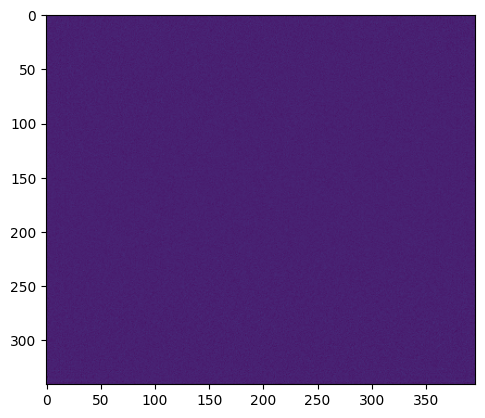

In [9]:
plt.imshow(GRcorr)

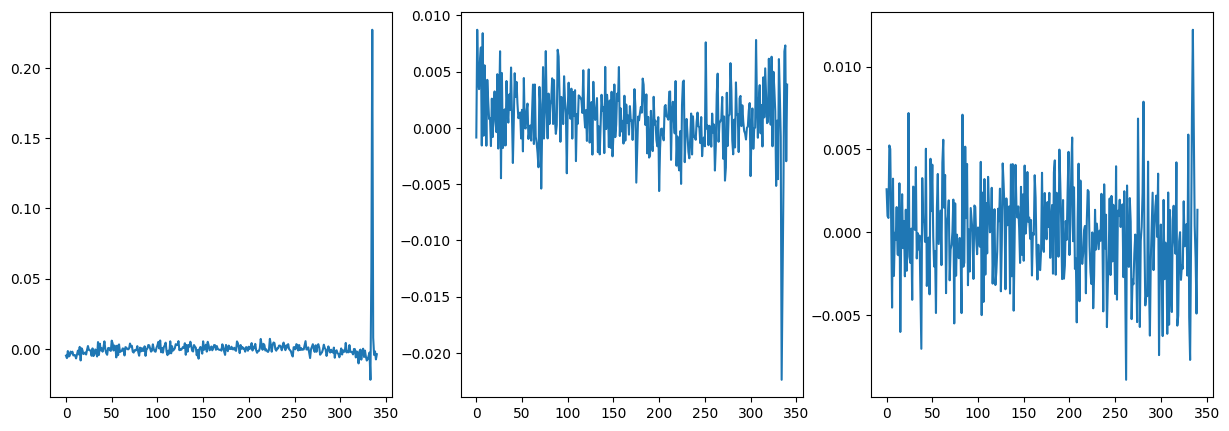

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(GRcorr[:, 0])
ax[1].plot(GRcorr[:, 1])
ax[2].plot(GRcorr[:, 2])

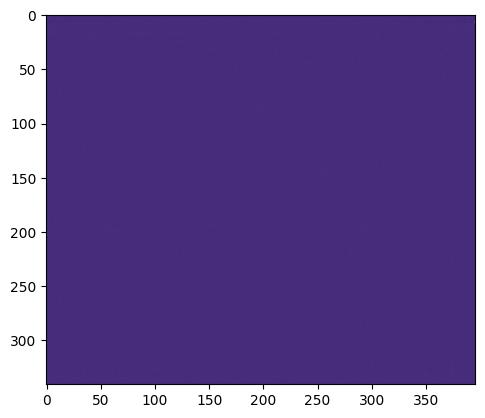

In [11]:
plt.imshow(GBcorr)

In [12]:
GRind

(335, 0)

In [13]:
GBind

(7, 395)

In [14]:
Rcomp = np.roll(Rcomp, GRind, axis=(0, 1))
Bcomp = np.roll(Bcomp, GBind, axis=(0, 1))

In [15]:
RGBout = np.stack([Rcomp, Gcomp, Bcomp], axis=-1)

In [16]:
cv2.imwrite('asiares.jpg', RGBout)

True